In [1]:
import pandas as pd
import cv2
from typing import List
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('annotation.csv', delimiter=',', usecols = (0, 2), names = ('AbsPath', 'Name'))

In [3]:
df

,AbsPath,Name
0,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear
1,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear
2,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear
3,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear
4,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear
...,...,...
1991,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear
1992,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear
1993,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear
1994,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear


In [4]:
df['Class'] = df['Name'].apply(lambda name: 0 if name == 'polarbear' else 1)

In [5]:
df

,AbsPath,Name,Class
0,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0
1,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0
2,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0
3,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0
4,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0
...,...,...,...
1991,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1
1992,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1
1993,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1
1994,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1


In [6]:
def func(path):
  print(path)
  cv2.imread(path).shape[0]
df['Width']=df['AbsPath'].apply(func)

D:\2 Curs(yes)\not mine\Aplication-Programming-main\dataset\polarbear\0000.jpg
D:\2 Curs(yes)\not mine\Aplication-Programming-main\dataset\polarbear\0001.jpg
D:\2 Curs(yes)\not mine\Aplication-Programming-main\dataset\polarbear\0002.jpg
D:\2 Curs(yes)\not mine\Aplication-Programming-main\dataset\polarbear\0003.jpg
D:\2 Curs(yes)\not mine\Aplication-Programming-main\dataset\polarbear\0004.jpg
D:\2 Curs(yes)\not mine\Aplication-Programming-main\dataset\polarbear\0005.jpg
D:\2 Curs(yes)\not mine\Aplication-Programming-main\dataset\polarbear\0006.jpg
D:\2 Curs(yes)\not mine\Aplication-Programming-main\dataset\polarbear\0007.jpg
D:\2 Curs(yes)\not mine\Aplication-Programming-main\dataset\polarbear\0008.jpg
D:\2 Curs(yes)\not mine\Aplication-Programming-main\dataset\polarbear\0009.jpg
D:\2 Curs(yes)\not mine\Aplication-Programming-main\dataset\polarbear\0010.jpg
D:\2 Curs(yes)\not mine\Aplication-Programming-main\dataset\polarbear\0011.jpg
D:\2 Curs(yes)\not mine\Aplication-Programming-main\

In [7]:
df['Height'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[0])

In [8]:
df['Width'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[1])

In [9]:
df['Depth'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[2])

In [10]:
df

,AbsPath,Name,Class,Width,Height,Depth
0,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,3000,2000,3
1,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,1920,1282,3
2,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,1500,1000,3
3,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,2700,1800,3
4,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,3000,2000,3
...,...,...,...,...,...,...
1991,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,1280,1024,3
1992,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,900,593,3
1993,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,800,800,3
1994,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,768,768,3


In [11]:
df.describe()

,Class,Width,Height,Depth
count,1996.000000,1996.000000,1996.000000,1996.0
mean,0.499499,1676.642285,1194.216934,3.0
std,0.500125,726.152500,490.501977,0.0
min,0.000000,500.000000,333.000000,3.0
25%,0.000000,1024.000000,800.000000,3.0
50%,0.000000,1600.000000,1080.000000,3.0
75%,1.000000,2048.000000,1366.000000,3.0
max,1.000000,3000.000000,3000.000000,3.0


In [12]:
df['Class'].describe().value_counts()

Class
0.000000       3
1.000000       2
1996.000000    1
0.499499       1
0.500125       1
Name: count, dtype: int64

In [13]:
def filter_df(df: pd.DataFrame, class_name: int) -> pd.DataFrame:
    new_df = df[df['Class'] == class_name]
    return new_df

In [14]:
df_0 = filter_df(df, 0) 
df_1 = filter_df(df, 1)

In [25]:
df_0

,AbsPath,Name,Class,Width,Height,Depth
0,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,3000,2000,3
1,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,1920,1282,3
2,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,1500,1000,3
3,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,2700,1800,3
4,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,3000,2000,3
...,...,...,...,...,...,...
994,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,1920,1200,3
995,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,910,910,3
996,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,962,644,3
997,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,900,900,3


In [16]:
def filter_df_max(df: pd.DataFrame, class_name: int, max_height: int, max_width: int) -> pd.DataFrame:
    new_df = df[(df['Class'] == class_name) & (df['Height'] <= max_height) & (df['Width'] <= max_width)]
    return new_df

In [17]:
df_0_filter = filter_df_max(df, 0, df['Height'].max(), df['Width'].max())
df_1_filter = filter_df_max(df, 1, df['Height'].max()-5, df['Width'].max()-5)

In [24]:
df_1_filter

,AbsPath,Name,Class,Width,Height,Depth
999,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,1920,1285,3
1000,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,1120,700,3
1001,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,2880,1800,3
1002,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,1680,1050,3
1003,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,1920,1200,3
...,...,...,...,...,...,...
1991,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,1280,1024,3
1992,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,900,593,3
1993,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,800,800,3
1994,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,768,768,3


In [19]:
df['Pixels'] = df['Height'] * df['Width'] * df['Depth']
df

,AbsPath,Name,Class,Width,Height,Depth,Pixels
0,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,3000,2000,3,18000000
1,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,1920,1282,3,7384320
2,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,1500,1000,3,4500000
3,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,2700,1800,3,14580000
4,D:\2 Curs(yes)\not mine\Aplication-Programming...,polarbear,0,3000,2000,3,18000000
...,...,...,...,...,...,...,...
1991,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,1280,1024,3,3932160
1992,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,900,593,3,1601100
1993,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,800,800,3,1920000
1994,D:\2 Curs(yes)\not mine\Aplication-Programming...,brownbear,1,768,768,3,1769472


In [20]:
grouped = df.groupby('Class').agg({'Pixels': ['max', 'min', 'mean']})
grouped

Pixels                       
            max      min          mean
Class                                 
0      26676000  1080000  6.958367e+06
1      27000000   499500  6.860953e+06

In [21]:
def get_hists(df: pd.DataFrame, class_name: int) -> List[np.ndarray]:
    class_df = filter_df(df, class_name)
    img = cv2.imread(class_df['AbsPath'].sample().values[0])
    hists = []
    for i in range(3):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        hists.append(hist)
    return hists

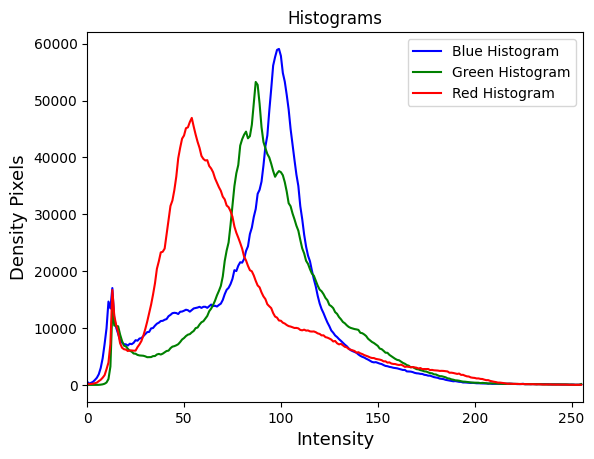

In [22]:
hists = get_hists(df, 1)
colors = ["Blue", "Green", "Red"]

for i in range(len(hists)):
    plt.plot(hists[i], color=colors[i], label=f"{colors[i]} Histogram")
    plt.xlim([0, 256])

plt.title("Histograms")
plt.xlabel('Intensity', fontsize = 13)
plt.ylabel('Density Pixels', fontsize = 13)
plt.legend()
plt.show()